In [1]:
import IPython.core.display
import matplotlib

def apply_styles():
    matplotlib.rcParams['font.size'] = 12
    matplotlib.rcParams['figure.figsize'] = (18, 6)
    matplotlib.rcParams['lines.linewidth'] = 1

apply_styles()

In [2]:
%%html
<style type="text/css">
@import url('https://fonts.googleapis.com/css?family=Playfair+Display');


div.text_cell_render {font-family: 'Playfair Display', serif; color: #13213b; line-height: 145%; font-size:16px;}
</style>

<span style="color:#13213b;">[Andrii Gakhov](https://www.gakhov.com) / PyCon UA 2018</span>
* * *
## An Introduction to Time Series Forecasting with Python
Time series is an important instrument to model, analyze and predict data collected over time. In this talk, we learn the basic theoretical concepts without going deep into mathematical aspects, study different models, and try them in practice using StatsModels, Prophet, scikit-learn, and keras.

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="ticks")

In [4]:
import pandas as pd

## The World Bank
### DataBankWorld Development Indicator 

#### Gold ($/troy ounce)

Gold (UK), 99.5% fine, London afternoon fixing, average of daily rates

Credentials: Platts Metals Week; International Monetary Fund, International Financial Statistics; Shearson Lehman Brothers, Metal Market Weekly Review; Thomson Reuters Datastream; World Bank.

In [5]:
from pandas_datareader import wb
df_wb = wb.download(indicator=['GOLD'], country='ALL', start='2000', end='2017', freq="M")
df_wb = df_wb.reset_index(1).reset_index(drop=True)
df_wb["year"] = pd.to_datetime(df_wb["year"], format='%YM%m')

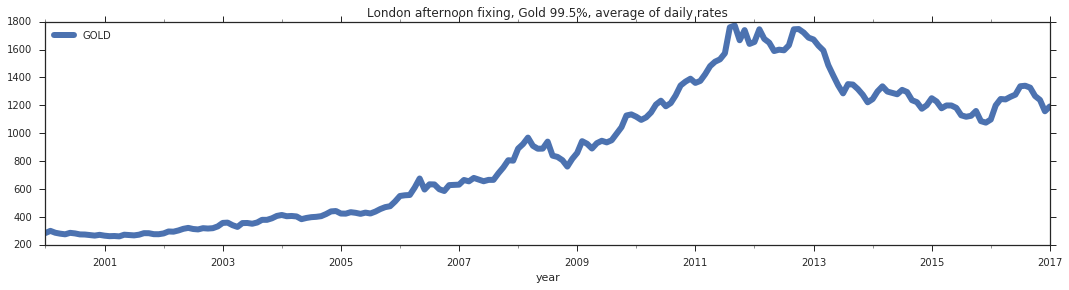

In [6]:
fig, ax = plt.subplots(figsize=(18,4))
df_wb.plot(x="year", y="GOLD", ax=ax, linewidth=6)
plt.legend(loc='upper left')
plt.title('London afternoon fixing, Gold 99.5%, average of daily rates')
plt.savefig('images/trend-wb-gold.png')

## European Climate Assessment & Dataset (ECA&D)

Klein Tank, A.M.G. and Coauthors, 2002. Daily dataset of 20th-century surface
air temperature and precipitation series for the European Climate Assessment.
Int. J. of Climatol., 22, 1441-1453.

Data and metadata available at http://www.ecad.eu

In [7]:
df_weather = pd.read_csv("data/TG_STAID004529.txt", header=14, skiprows=0, parse_dates=[1], na_values=[-9999])
df_weather.dropna(inplace=True)
df_weather.columns = ['SOUID', 'DATE', 'TG', 'Q_TG']
df_weather['TG'] = df_weather['TG'] * 0.1  # convert to Celcius

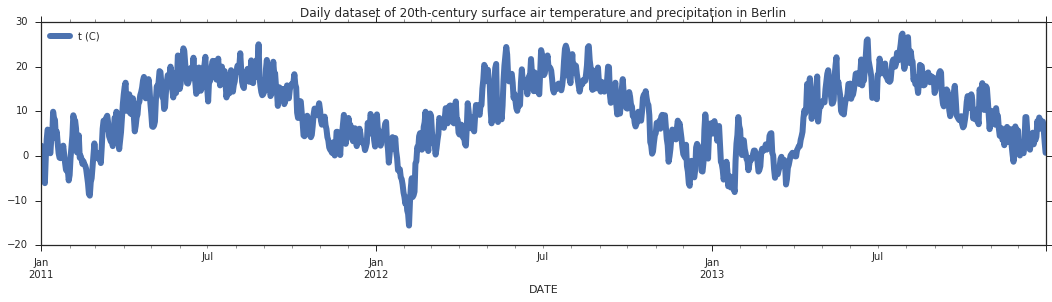

In [8]:
fig, ax = plt.subplots(figsize=(18,4))
df_weather[(df_weather.DATE >= '2011-01-01') & (df_weather.DATE < '2014-01-01')].plot(
    x='DATE', y='TG', ax=ax, linewidth=6, label="t (C)")
plt.legend(loc='upper left')
plt.title('Daily dataset of 20th-century surface air temperature and precipitation in Berlin')
plt.savefig('images/seasonal-weather-berlin.png')

## London W., Yorke J.A.

### Monthly reported number of cases of measles, New York city, 1928-1972

London W., Yorke J.A., 1973. Recurrent outbreaks of measles, chickenpox and mumps. (I. Seasonal variation in contact rates.) Am. J. Epidemiol. 98, 453–468. 

In [9]:
df_health = pd.read_csv("data/monthly-reported-number-of-cases.csv", skiprows=0)
df_health.columns = ['DATE', 'NUM']
df_health["DATE"] = pd.to_datetime(df_health["DATE"], format='%Y-%m')
df_health["NUM"].astype(int, copy=False);

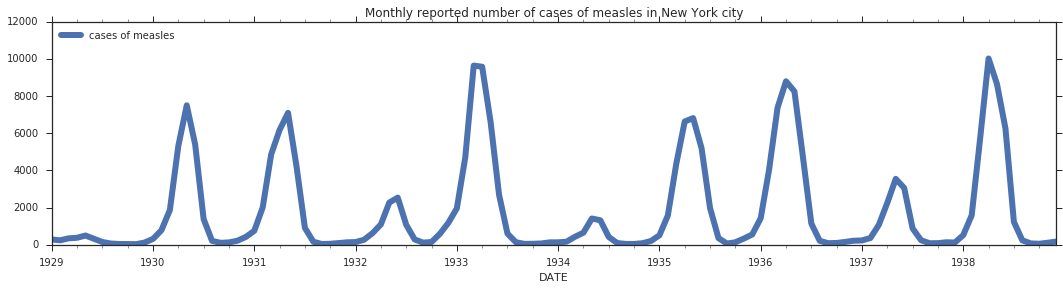

In [10]:
fig, ax = plt.subplots(figsize=(18,4))
df_health[(df_health.DATE >= '1929-01-01') & (df_health.DATE < '1939-01-01')].plot(
    x='DATE', y='NUM', ax=ax, linewidth=6, label="cases of measles")
plt.legend(loc='upper left')
plt.title('Monthly reported number of cases of measles in New York city')
plt.savefig('images/cyclical-health-nyc.png')

## Valuta.Today

### Daily average EUR-UAH exchange rates in the cash market, Ukraine, 2007- 2018
https://valuta.today


In [11]:
df_finance = pd.read_csv("data/avg-ukraine-EUR-cash.csv", header=[0], parse_dates=['date'])
df_finance.columns = ["DATE", "ASK", "BID"]
df_finance["ASK"].astype(float, copy=False);
df_finance["BID"].astype(float, copy=False);

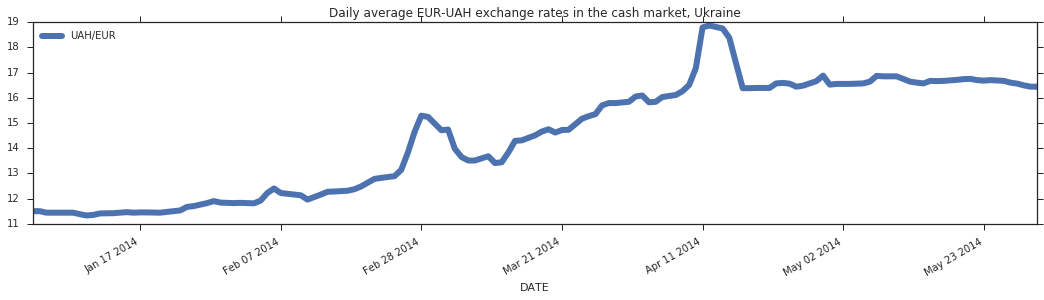

In [12]:
fig, ax = plt.subplots(figsize=(18,4))
df_finance[(df_finance.DATE >= '2014-01-01') & (df_finance.DATE < '2014-06-01')].plot(
    x='DATE', y='ASK', ax=ax, linewidth=6, label="UAH/EUR")
plt.legend(loc='upper left')
plt.title('Daily average EUR-UAH exchange rates in the cash market, Ukraine')
plt.savefig('images/irregular-finance-ukraine.png');

## RSI: Alcoholic Drinks, Beverages & Tobacco (val nsa), All Business Index (1988-2018)

#### Source dataset: Retail sales time series dataset (DRSI)
https://www.ons.gov.uk/businessindustryandtrade/retailindustry/timeseries/cy45/drsi

In [13]:
df_food = pd.read_csv("data/alkohol.csv", header=0, skiprows=7, parse_dates=[0])
df_food.columns = ["DATE", "NUM"]
df_food["NUM"].astype(float, copy=False);

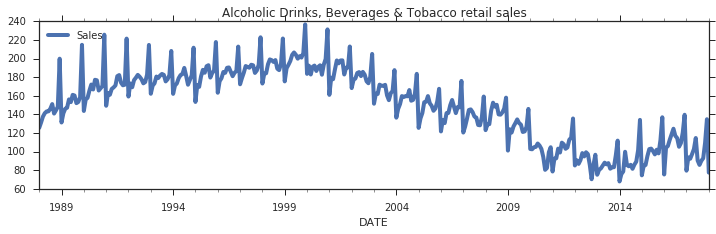

In [14]:
fig, ax = plt.subplots(figsize=(12,3))
df_food.plot(x='DATE', y='NUM', ax=ax, linewidth=4, label="Sales")
plt.legend(loc='upper left')
plt.title('Alcoholic Drinks, Beverages & Tobacco retail sales')
plt.savefig('images/additive-food-alcohol.png');

## International airline passengers: monthly totals in thousands. Jan 49 – Dec 60

#### Source dataset: Time Series Data Library (citing: Box & Jenkins (1976))
https://datamarket.com/data/set/22u3/international-airline-passengers-monthly-totals-in-thousands-jan-49-dec-60

In [15]:
df_airline = pd.read_csv("data/international-airline-passengers.csv", header=0, skiprows=1, parse_dates=[0])
df_airline.columns = ["DATE", "NUM"]
df_airline["DATE"] = pd.to_datetime(df_airline["DATE"], format='%Y-%m')
df_airline["NUM"].astype(int, copy=False);

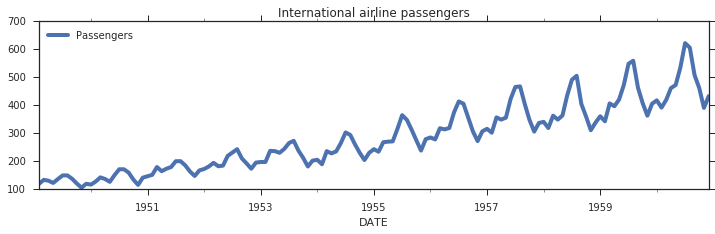

In [16]:
fig, ax = plt.subplots(figsize=(12,3))
df_airline.plot(x='DATE', y='NUM', ax=ax, linewidth=4, label="Passengers")
plt.legend(loc='upper left')
plt.title('International airline passengers')
plt.savefig('images/multiplicative-airline.png');

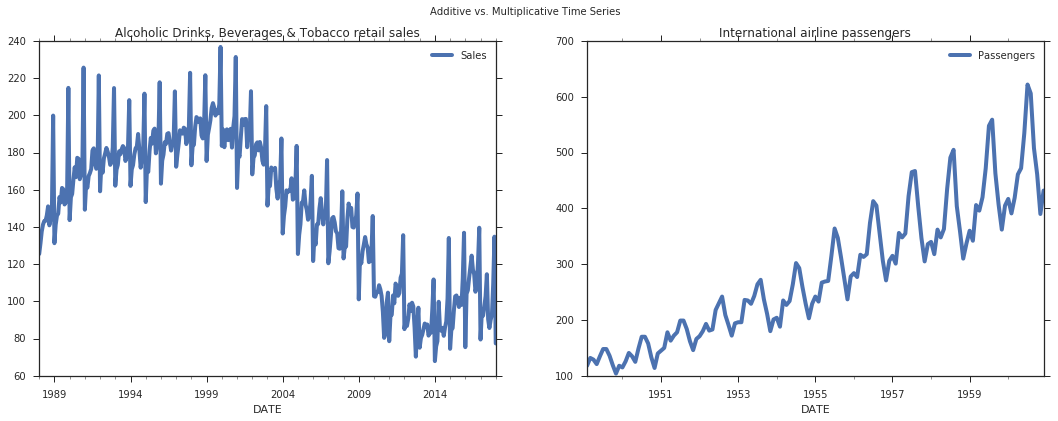

In [17]:
fig, ax = plt.subplots(figsize=(18,6))

plt.axis('off')
plt.box(on=None)
fig.suptitle("Additive vs. Multiplicative Time Series")


ax1 = fig.add_subplot(121)
df_food.plot(x='DATE', y='NUM', ax=ax1, linewidth=4, label="Sales")
ax1.set_title('Alcoholic Drinks, Beverages & Tobacco retail sales')

ax2 = fig.add_subplot(122)
df_airline.plot(x='DATE', y='NUM', ax=ax2, linewidth=4, label="Passengers")
ax2.set_title('International airline passengers')

plt.savefig('images/additive-vs-multiplicative.png');